Please answer the following questions based on Mcdonald CSV
1.	Plot graphically which food categories have the highest and lowest varieties.
2.	Which all variables have an outlier?
3.	Which variables have the highest correlation? Plot them and find out the value?
4.	Which category contributes to the maximum % of Cholesterol in a diet (% daily value)?
5.	Which item contributes maximum to the Sodium intake?
6.	Which 4 food items contain the most amount of Saturated Fat?

Rules for the Competition :
1.	Upload a PDF/HTML file.
2.	Top performers will be announced on basis of those of you who answer not only the above questions but also think a little out of the box to present the analysis with a lot of graphical representation. (Use all the commands and techniques learned in Python for Data Science and SMDM first two weeks).


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import warnings
warnings.filterwarnings ('ignore')

In [2]:
df=pd.read_csv("Mcdonald .csv")

In [3]:
df.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

In [5]:
#Plot graphically which food categories have the highest and lowest varieties.
Items_per_category=df.groupby(['Category']).size().sort_values(ascending=False)

In [6]:
print(Items_per_category)

Category
Coffee & Tea          95
Breakfast             42
Smoothies & Shakes    28
Beverages             27
Chicken & Fish        27
Beef & Pork           15
Snacks & Sides        13
Desserts               7
Salads                 6
dtype: int64


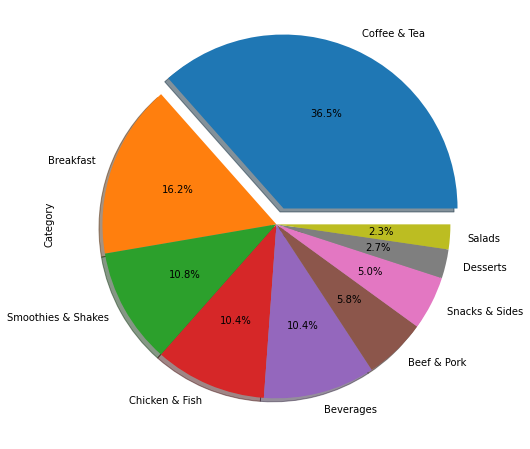

In [7]:
plt.figure(figsize=(8,8))
labels=df['Category']
explodepie = (0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
df.Category.value_counts().plot.pie(normalize=True,shadow=True,explode=explodepie,autopct='%1.1f%%');


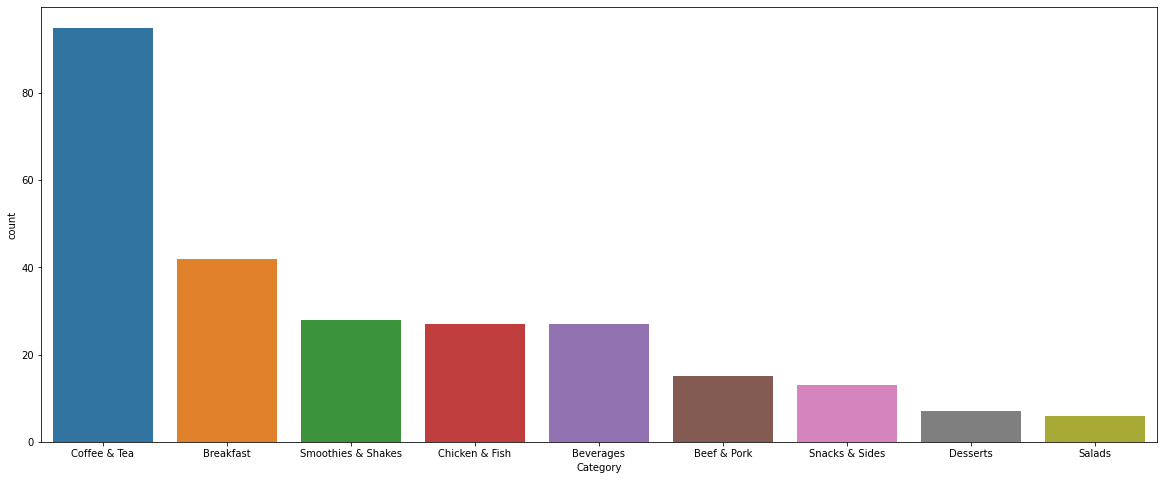

In [8]:
plt.figure(figsize=(20,8))
#sns.swarmplot(df['Category'], df['Item'])
sns.countplot(df['Category'],linewidth=2,order = df['Category'].value_counts().index);

As per the above graph we can conclude, Items in Coffee & Tea has highest number of counts then comes Breakfast category.

In [9]:
df[df['Category']=='Coffee & Tea'] #Verification for analysis

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
137,Coffee & Tea,Iced Tea (Small),16 fl oz cup,0,0,0.0,0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
138,Coffee & Tea,Iced Tea (Medium),21 fl oz cup,0,0,0.0,0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
139,Coffee & Tea,Iced Tea (Large),30 fl oz cup,0,0,0.0,0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
140,Coffee & Tea,Iced Tea (Child),12 fl oz cup,0,0,0.0,0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
141,Coffee & Tea,Sweet Tea (Small),16 fl oz cup,150,0,0.0,0,0.0,0,0.0,...,36,12,0,0,36,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,Coffee & Tea,Frappé Caramel (Medium),16 fl oz cup,550,200,23.0,35,15.0,73,1.0,...,79,26,0,0,71,9,20,0,30,2
228,Coffee & Tea,Frappé Caramel (Large),22 fl oz cup,670,250,27.0,42,17.0,87,1.5,...,96,32,0,0,88,11,20,0,35,2
229,Coffee & Tea,Frappé Chocolate Chip (Small),12 fl oz cup,530,200,23.0,35,14.0,72,1.0,...,76,25,1,5,67,8,15,0,25,4
230,Coffee & Tea,Frappé Chocolate Chip (Medium),16 fl oz cup,630,240,26.0,41,17.0,85,1.0,...,91,30,1,5,81,9,15,0,30,4


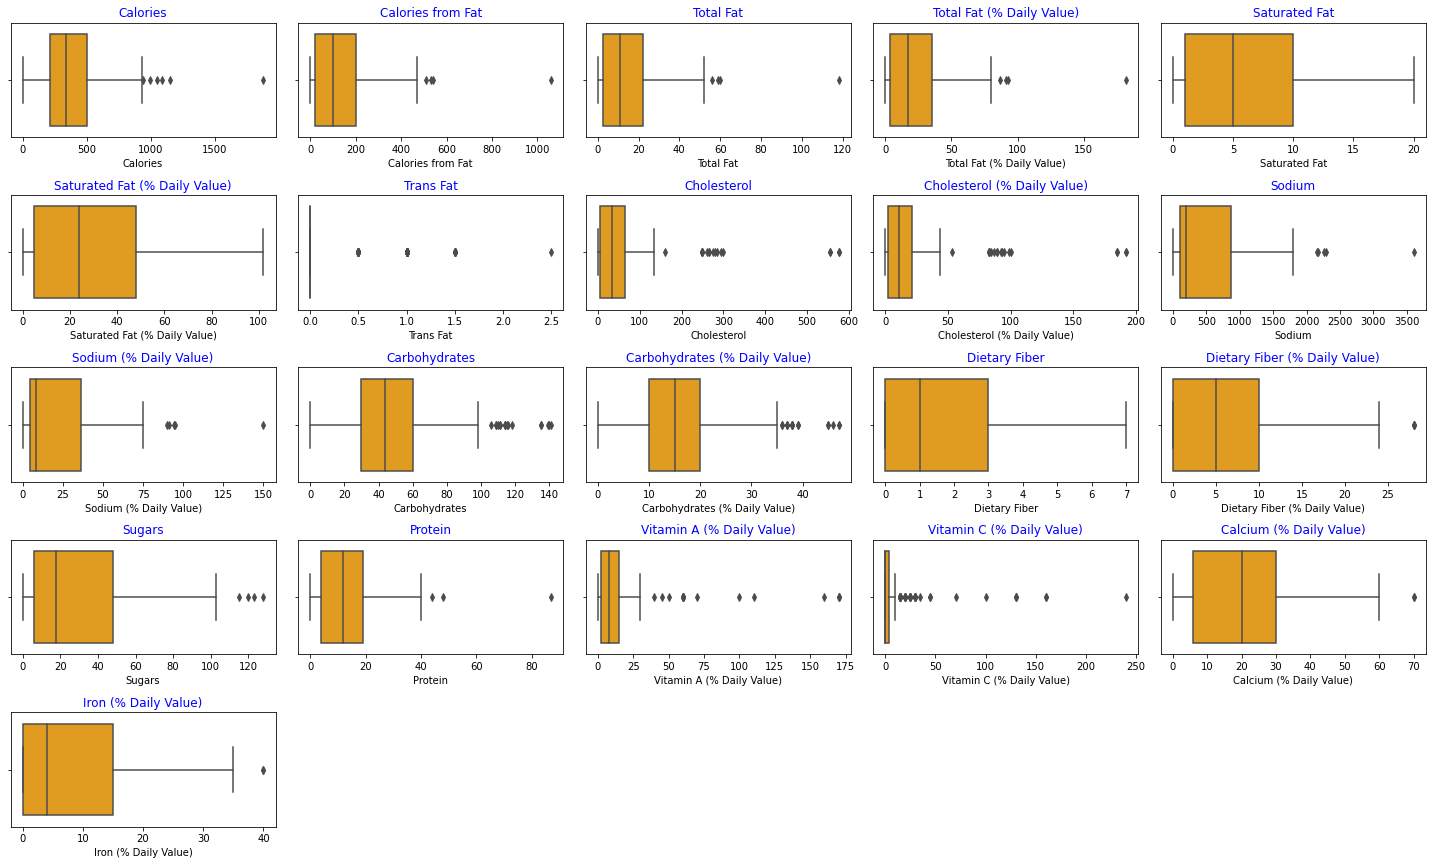

In [10]:
#Which all variables have an outlier?
data_plot=df[df.dtypes[df.dtypes!='object'].index]
fig=plt.figure(figsize=(20,50))
for i in range(0,len(data_plot.columns)):
   ax=fig.add_subplot(21,5,i+1)
   sns.boxplot(data_plot[data_plot.columns[i]],color ='orange')
   ax.set_title(data_plot.columns[i],color='blue')
plt.tight_layout()

Saturated Fats, Saturated Fats(% Daily value),Dietary Fiber doesn't have any outlier and rest of variables have outliers.

In [11]:
#Which variables have the highest correlation? Plot them and find out the value?
corr=df.corr()

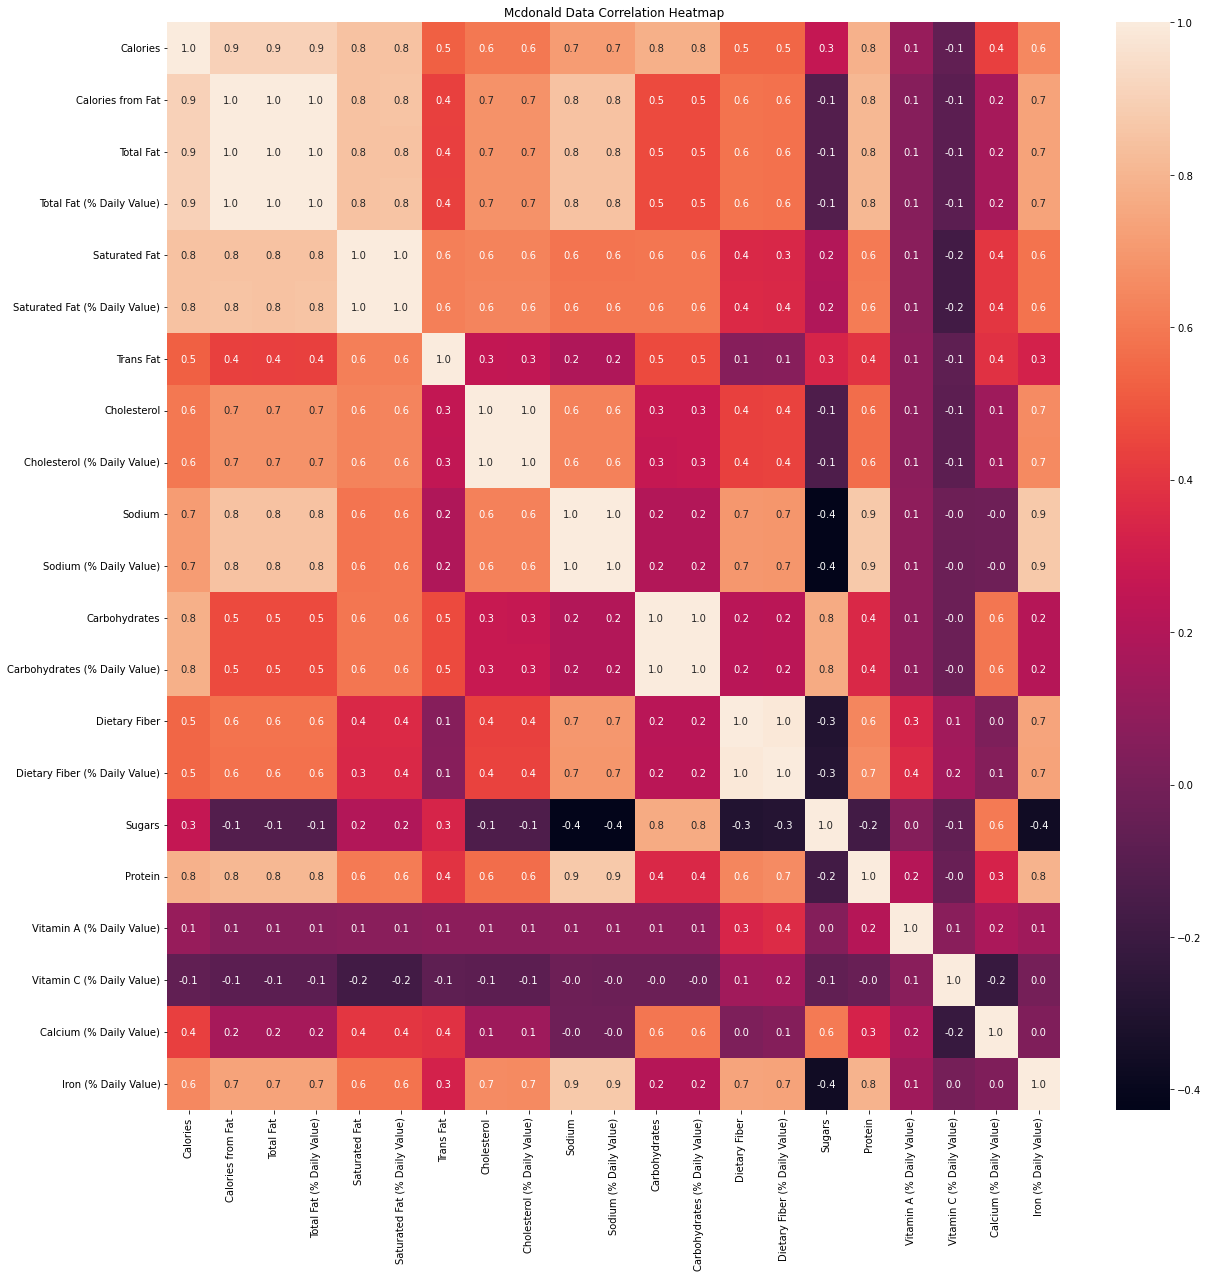

In [12]:
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True,fmt= '.1f')
plt.title("Mcdonald Data Correlation Heatmap");

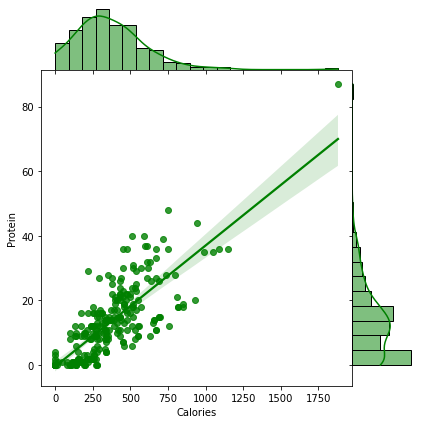

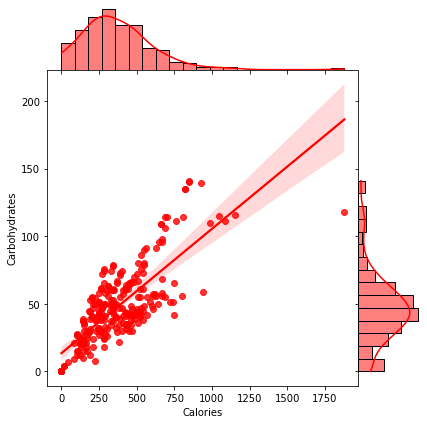

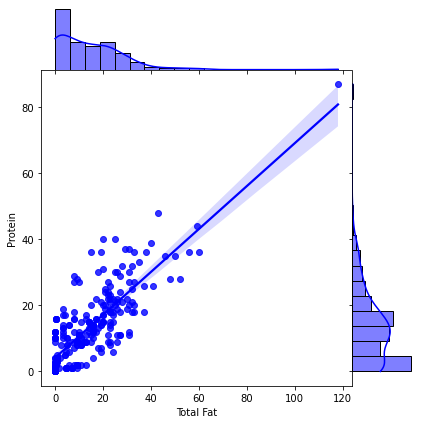

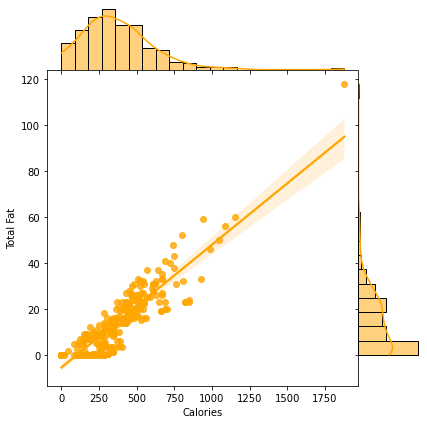

In [13]:
#Co-orelation plot between calories and Protein 
sns.jointplot(x= "Calories", y = "Protein", data = df,  kind="reg", space=0, color="g")
#Co-orelation plot between calories and Carbohydrates
sns.jointplot(x= "Calories", y = "Carbohydrates", data = df,  kind="reg", space=0, color="r")
#Co-orelation plot between Total Fat and Protein 
sns.jointplot(x= "Total Fat", y = "Protein", data = df,  kind="reg", space=0, color="b") 
#Co-orelation plot between calories and Total Fat
sns.jointplot(x= "Calories", y = "Total Fat",data = df,  kind="reg", space=0, color="orange")
plt.show()

Calories, Calories from Fat and Total Fat has highest correlation.

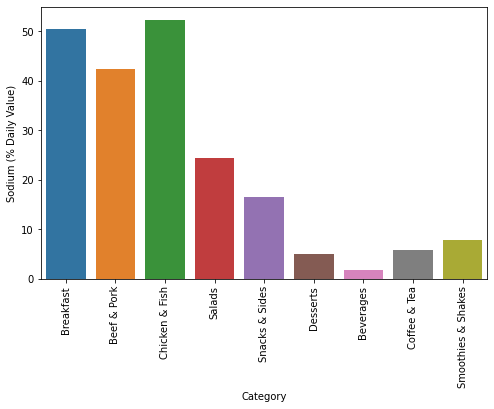

In [14]:
#Which item contributes maximum to the Sodium intake?
plt.figure(figsize=(8,5))
sns.barplot('Category','Sodium (% Daily Value)',data=df,ci=None)
plt.xticks(rotation=90);

Chicken and Fish Category contribute maximum to the sodium intake.

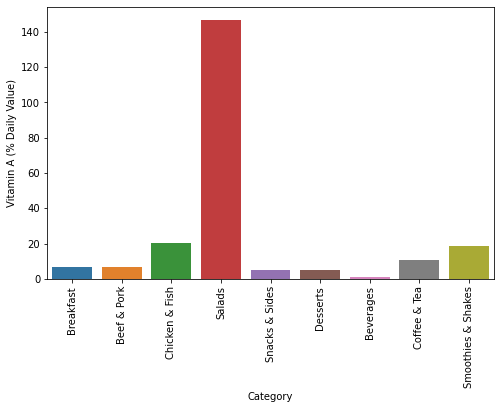

In [15]:
# Bar chart for Vit A Range in % for Different Category
plt.figure(figsize=(8,5))
sns.barplot('Category','Vitamin A (% Daily Value)',data=df,ci=None)
plt.xticks(rotation=90);

Above representation confirm Vitamin A is majorly (almost 170%) in salad category

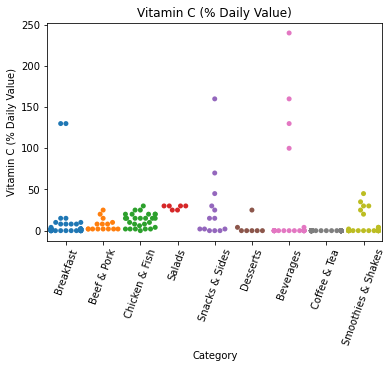

In [16]:
# Swarmplot for Vit C Range in % for Different Category
plot = sns.swarmplot(x="Category", y="Vitamin C (% Daily Value)", data=df)
plt.setp(plot.get_xticklabels(),rotation=70)
plt.title("Vitamin C (% Daily Value)")
plt.show()

It is measure as Vitamin C is majorly found i.e.almost 240% in Beverages Category

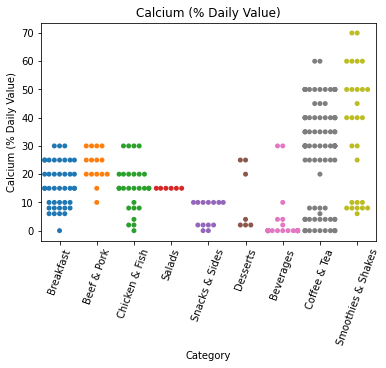

In [17]:
# Swarmplot for Calcium in % for Different Category
plot = sns.swarmplot(x="Category", y="Calcium (% Daily Value)", data=df)
plt.setp(plot.get_xticklabels(),rotation=70)
plt.title("Calcium (% Daily Value)")
plt.show()

It is found that Smoothies and Shakes are the highest source of Calcium.

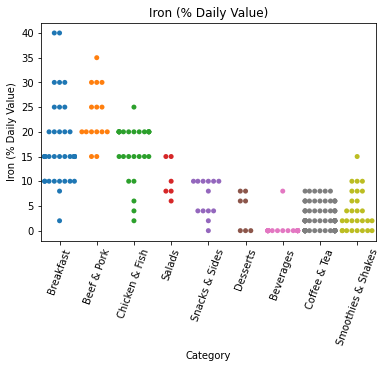

In [18]:
#Swarmplot for Iron in %Daily value for Different Category
plot = sns.swarmplot(x="Category", y="Iron (% Daily Value)", data=df)
plt.setp(plot.get_xticklabels(),rotation=70)
plt.title("Iron (% Daily Value)")
plt.show()

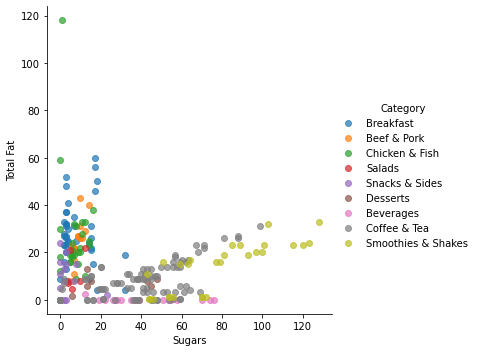

In [19]:
sns.lmplot(y='Total Fat',x='Sugars',hue='Category',data=df,fit_reg=False,scatter_kws={'alpha':0.7});

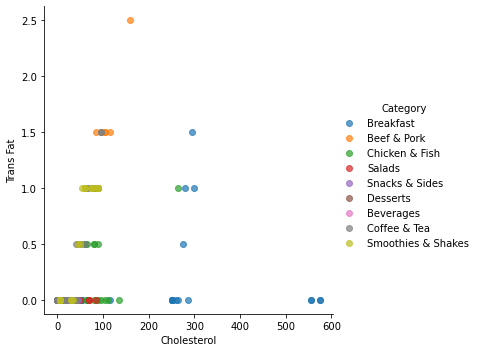

In [20]:
sns.lmplot(y='Trans Fat',x='Cholesterol',hue='Category',data=df,fit_reg=False,scatter_kws={'alpha':0.7});

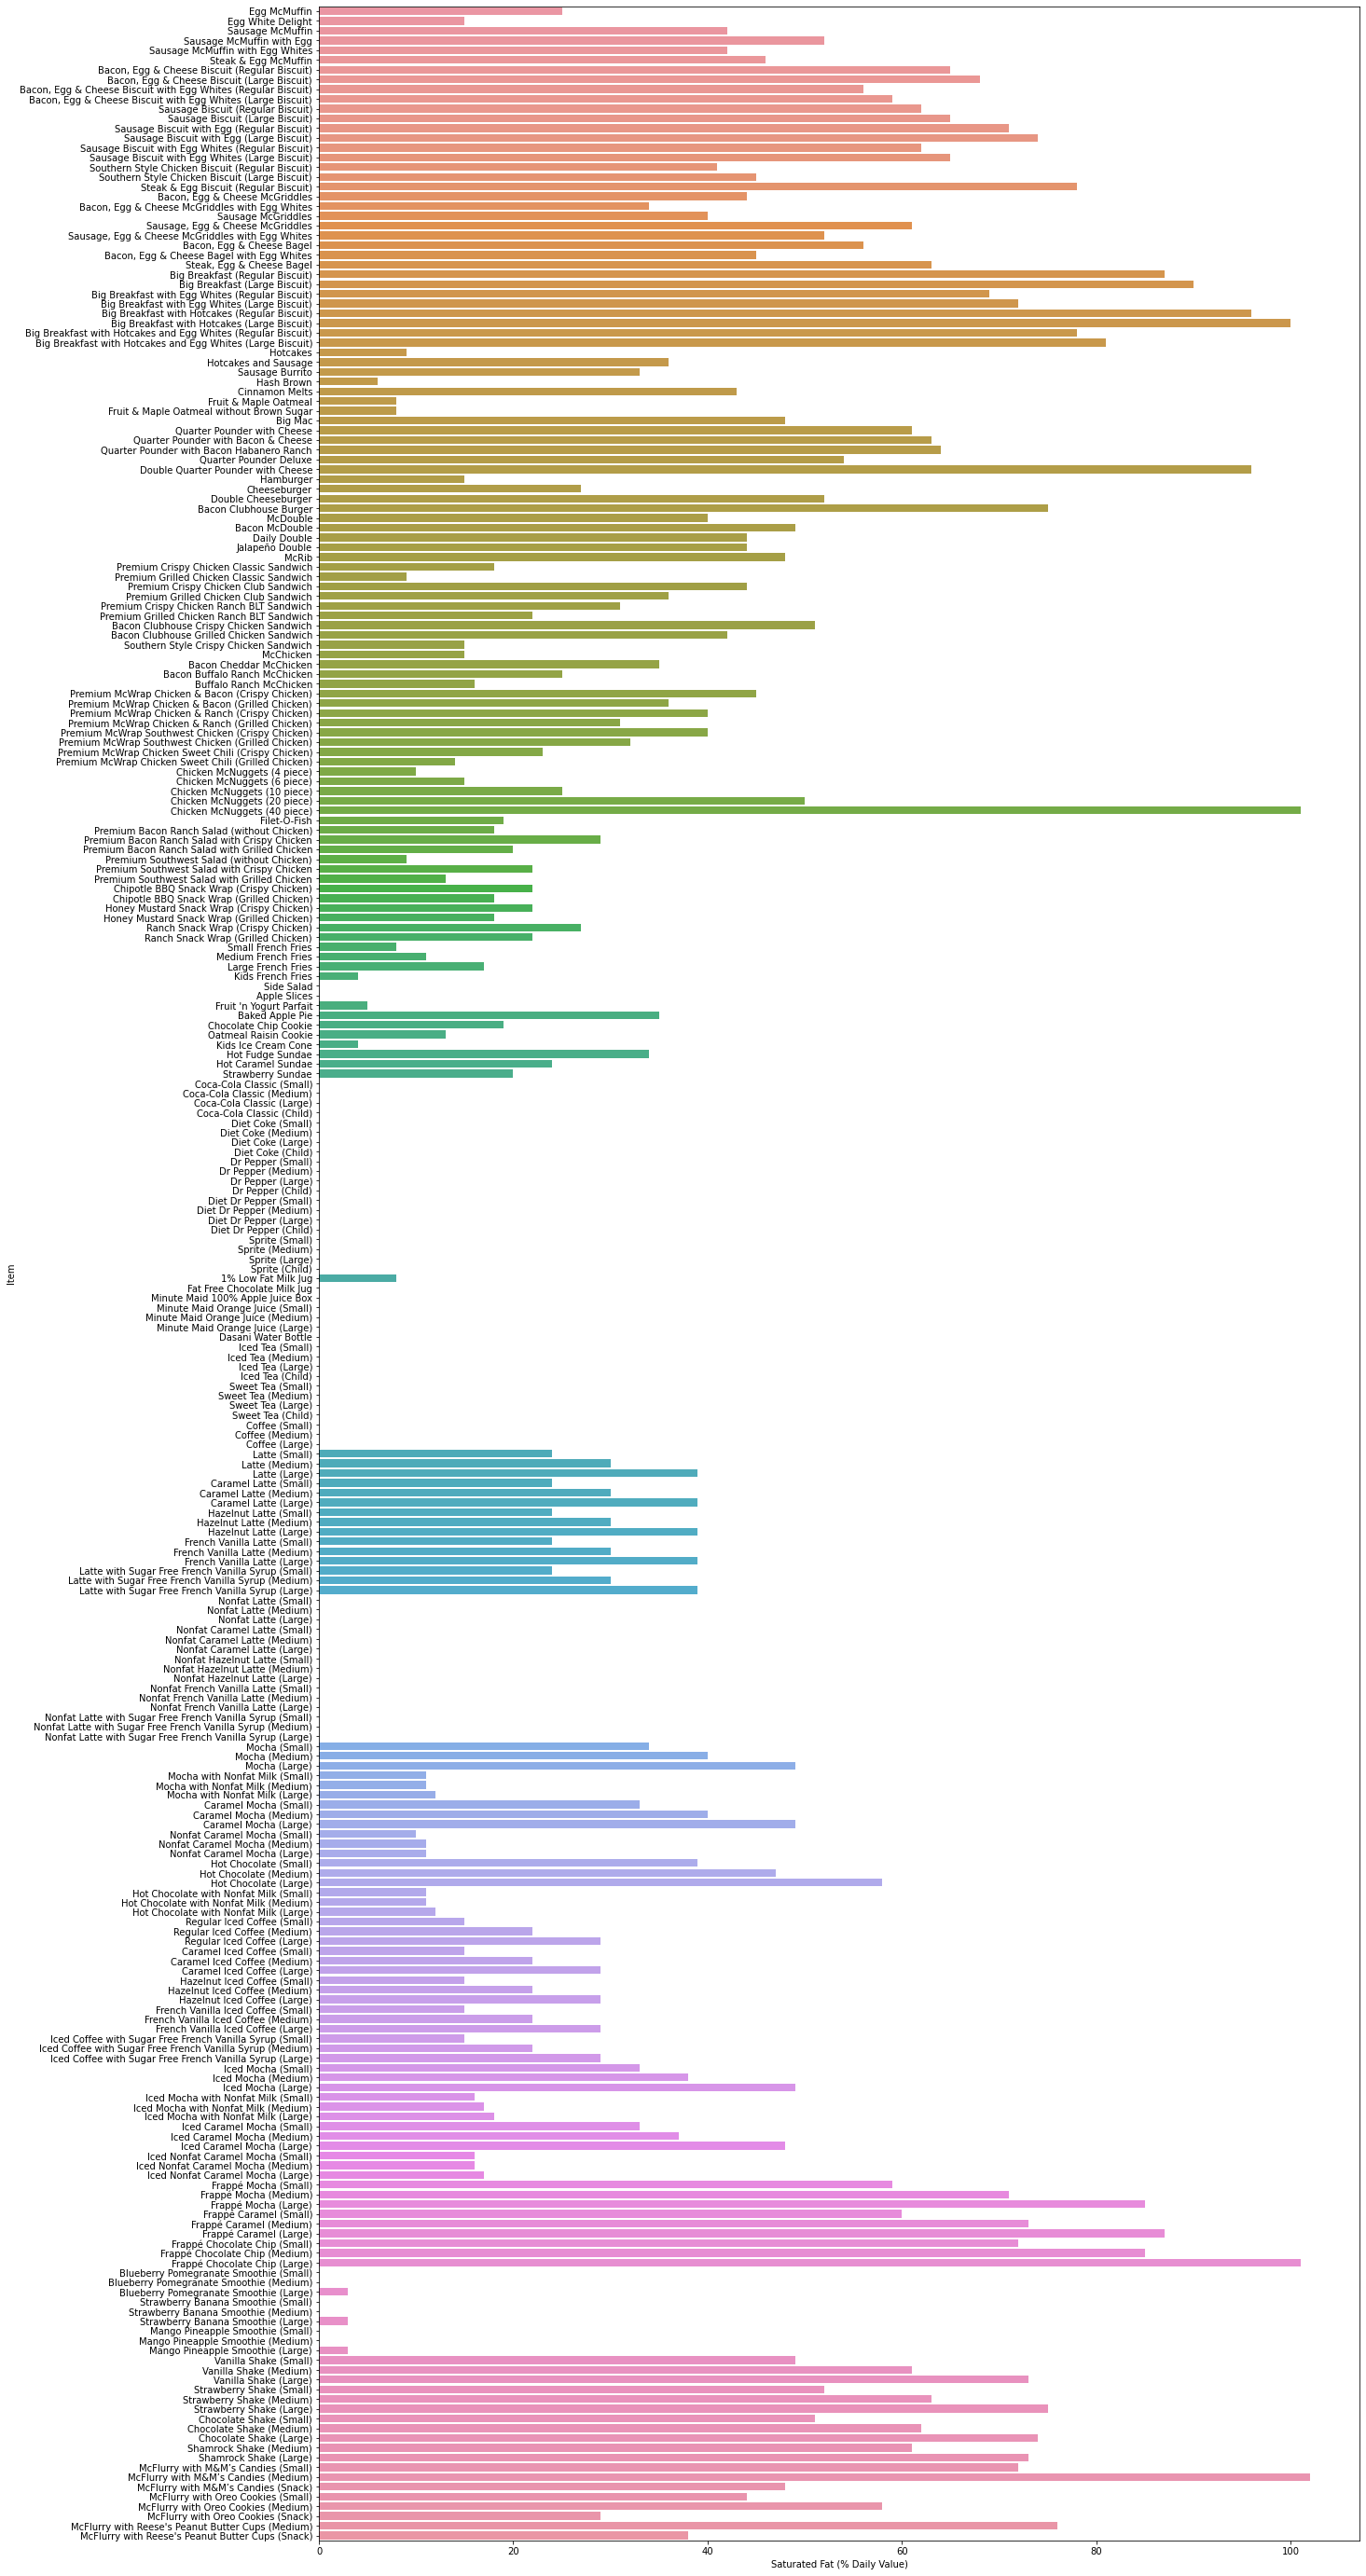

In [21]:
#Which 4 food items contain the most amount of Saturated Fat?
plt.figure(figsize=(20,50))
sns.barplot('Saturated Fat (% Daily Value)','Item',data=df,ci=None,errwidth=0);

In [22]:
df.groupby(['Item']).sum().sort_values(ascending=False,by='Saturated Fat (% Daily Value)')

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
Item,,,,,,,,,,,,,,,,,,,,,
McFlurry with M&M’s Candies (Medium),930,290,33.0,50,20.0,102,1.0,75,25,260,...,139,46,2,7,128,20,25,0,70,10
Frappé Chocolate Chip (Large),760,280,31.0,48,20.0,101,1.5,95,32,200,...,111,37,1,5,99,12,20,0,35,6
Chicken McNuggets (40 piece),1880,1060,118.0,182,20.0,101,1.0,265,89,3600,...,118,39,6,24,1,87,0,15,8,25
Big Breakfast with Hotcakes (Large Biscuit),1150,540,60.0,93,20.0,100,0.0,575,192,2260,...,116,39,7,28,17,36,15,2,30,40
Double Quarter Pounder with Cheese,750,380,43.0,66,19.0,96,2.5,160,53,1280,...,42,14,3,11,10,48,10,2,30,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Diet Dr Pepper (Medium),0,0,0.0,0,0.0,0,0.0,0,0,100,...,0,0,0,0,0,3,0,0,0,0
Diet Dr Pepper (Large),0,0,0.0,0,0.0,0,0.0,0,0,140,...,0,0,0,0,0,4,0,0,0,0
Diet Dr Pepper (Child),0,0,0.0,0,0.0,0,0.0,0,0,50,...,0,0,0,0,0,1,0,0,0,0


McFlurry with M&M’s Candies (Medium),Frappé Chocolate Chip (Large),Chicken McNuggets (40 piece),Big Breakfast with Hotcakes (Large Biscuit) and Double Quarter Pounder with Cheese are four Top items having most amount of saturation fats (%daily value).